# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [12]:
city

'cape town'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
url = "http://api.openweathermap.org/data/2.5/weather"
params = {"appid" : weather_api_key}
empty=[]
x=0
y=1
z=1
print("Beginning Data Retrieval")
print("---------------------------------")
for city in cities:
    params["q"] = city
    response = requests.get(url,params=params).json()
    try:
        empty.append(response["name"])
        print(f"Processing Record of {y} Set {z}  | {empty[x]}")
        x=x+1
        y=y+1
        if y > 49:
            y=1
            z=z+1
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
---------------------------------
Processing Record of 1 Set 1  | Busselton
Processing Record of 2 Set 1  | Lagoa
Processing Record of 3 Set 1  | Ribeira Grande
Processing Record of 4 Set 1  | Souillac
Processing Record of 5 Set 1  | Kawalu
Processing Record of 6 Set 1  | Pedroso
Processing Record of 7 Set 1  | Mataura
City not found. Skipping...
Processing Record of 8 Set 1  | Baoning
Processing Record of 9 Set 1  | Coahuayana Viejo
City not found. Skipping...
Processing Record of 10 Set 1  | Dikson
Processing Record of 11 Set 1  | San Miguel de Cozumel
Processing Record of 12 Set 1  | Albany
Processing Record of 13 Set 1  | Rikitea
Processing Record of 14 Set 1  | Saint Anthony
Processing Record of 15 Set 1  | Hithadhoo
Processing Record of 16 Set 1  | Saint-Philippe
Processing Record of 17 Set 1  | Padang
Processing Record of 18 Set 1  | Khatanga
Processing Record of 19 Set 1  | Barcelona
Processing Record of 20 Set 1  | Cayenne
Processing Record of 21 Set 1

Processing Record of 35 Set 4  | Hammerfest
Processing Record of 36 Set 4  | Florida
Processing Record of 37 Set 4  | Lavrentiya
Processing Record of 38 Set 4  | Nikolskoye
Processing Record of 39 Set 4  | Masty
Processing Record of 40 Set 4  | Natal
Processing Record of 41 Set 4  | Airai
Processing Record of 42 Set 4  | Beberibe
Processing Record of 43 Set 4  | Bosaso
Processing Record of 44 Set 4  | Oranjemund
Processing Record of 45 Set 4  | Chokurdakh
Processing Record of 46 Set 4  | Ballina
Processing Record of 47 Set 4  | Tupiza
Processing Record of 48 Set 4  | Mossamedes
Processing Record of 49 Set 4  | Meadow Lake
Processing Record of 1 Set 5  | Bilokurakyne
City not found. Skipping...
Processing Record of 2 Set 5  | Sahuaripa
Processing Record of 3 Set 5  | Saldanha
City not found. Skipping...
Processing Record of 4 Set 5  | Sun Valley
Processing Record of 5 Set 5  | Poum
Processing Record of 6 Set 5  | Kruisfontein
Processing Record of 7 Set 5  | Powell
Processing Record of 8

Processing Record of 19 Set 8  | Ajdabiya
Processing Record of 20 Set 8  | Jining
Processing Record of 21 Set 8  | Voi
Processing Record of 22 Set 8  | Kitimat
Processing Record of 23 Set 8  | Northam
Processing Record of 24 Set 8  | Agirish
Processing Record of 25 Set 8  | Laas
City not found. Skipping...
Processing Record of 26 Set 8  | Longyearbyen
Processing Record of 27 Set 8  | Comodoro Rivadavia
Processing Record of 28 Set 8  | Blind River
Processing Record of 29 Set 8  | Cockburn Town
Processing Record of 30 Set 8  | São Filipe
City not found. Skipping...
Processing Record of 31 Set 8  | San Juan
Processing Record of 32 Set 8  | Chumikan
Processing Record of 33 Set 8  | Pinega
City not found. Skipping...
Processing Record of 34 Set 8  | Ponta Delgada
Processing Record of 35 Set 8  | Luwingu
Processing Record of 36 Set 8  | Griffith
Processing Record of 37 Set 8  | Mbini
City not found. Skipping...
Processing Record of 38 Set 8  | Nhulunbuy
Processing Record of 39 Set 8  | Ati
P

Processing Record of 7 Set 12  | Worland
Processing Record of 8 Set 12  | Mandeville
Processing Record of 9 Set 12  | Lompoc
Processing Record of 10 Set 12  | Kimbe
Processing Record of 11 Set 12  | Alappuzha
Processing Record of 12 Set 12  | Zemio
Processing Record of 13 Set 12  | Havre-St-Pierre


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
file = "../output_data/cities.csv"
city_df = pd.read_csv(file)
city_df.count()

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [57]:
city_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
humid_below_100_df = city_df.loc[city_df["Humidity"]<=100]
humid_below_100_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.000000,547.000000,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000
mean,273.764168,49.495430,1.558379e+09,67.265082,19.710402,20.861609,64.975119,8.657057
std,158.362260,36.887333,7.826709e+01,21.723477,33.637627,90.285396,18.721163,5.859917
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,137.500000,14.000000,1.558379e+09,52.000000,-6.315000,-60.820000,53.940000,4.680000
50%,274.000000,47.000000,1.558379e+09,71.000000,21.430000,21.550000,64.990000,7.000000
75%,410.500000,81.000000,1.558379e+09,86.000000,47.895000,103.165000,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,100.000000,78.220000,179.320000,104.100000,46.080000


In [66]:
#  Get the indices of cities that have humidity over 100%.
humid_above_100_df = city_df.loc[city_df["Humidity"]>100]
humid_above_100_df["City_ID"]

129    129
Name: City_ID, dtype: int64

In [87]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
quartiles = city_df["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

above_outlier = city_df.loc[city_df["Humidity"] > lower_bound]
below_outlier = city_df.loc[city_df["Humidity"] < upper_bound]
clean_data = city_df.loc[(city_df["Humidity"] > lower_bound) & (city_df["Humidity"] < upper_bound)]
clean_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plots Latitude against Temperature. It shows that temperature is highest when the latitude is 0 and gets lower as it goes away from 0.


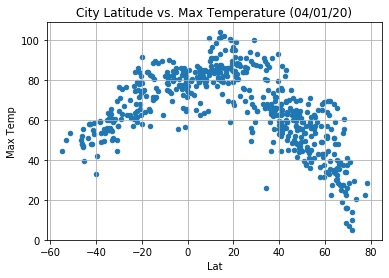

In [148]:
clean_data.plot(x='Lat',y='Max Temp',kind = 'scatter',title='City Latitude vs. Max Temperature (04/01/20)',grid="True")
print("This plots Latitude against Temperature. It shows that temperature is highest when the latitude is 0 and gets lower as it goes away from 0.")

## Latitude vs. Humidity Plot

The data doesnt seem to particularly show correlation between the humidity and latitude.


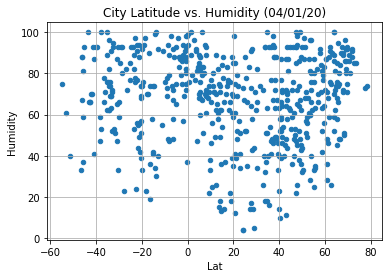

In [149]:
clean_data.plot(x='Lat',y='Humidity',kind = 'scatter',title='City Latitude vs. Humidity (04/01/20)',grid="True")
print("The data doesnt seem to particularly show correlation between the humidity and latitude.")

## Latitude vs. Cloudiness Plot

This data also doesn't seemt to particularly show any correlation between cloudiness and latitude.


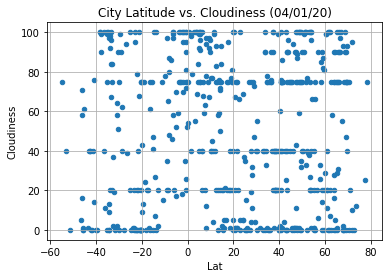

In [150]:
clean_data.plot(x='Lat',y='Cloudiness',kind = 'scatter',title='City Latitude vs. Cloudiness (04/01/20)',grid="True")
print("This data also doesn't seemt to particularly show any correlation between cloudiness and latitude.")

## Latitude vs. Wind Speed Plot

Although there doesn't seem to be any particular correlation in wind speed and latitude, wind speeds seem to be relatively similar among most countries.


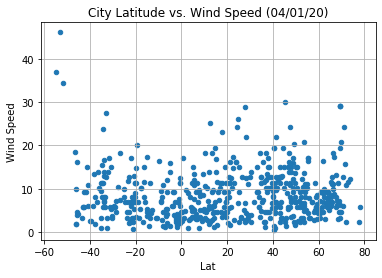

In [151]:
clean_data.plot(x='Lat',y='Wind Speed',kind = 'scatter',title='City Latitude vs. Wind Speed (04/01/20)',grid="True")
print("Although there doesn't seem to be any particular correlation in wind speed and latitude, wind speeds seem to be relatively similar among most countries.")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [128]:
# Create Northern and Southern Hemisphere DataFrames
north_data = clean_data.loc[clean_data["Lat"]>=0]
south_data = clean_data.loc[clean_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

This shows negative correlation


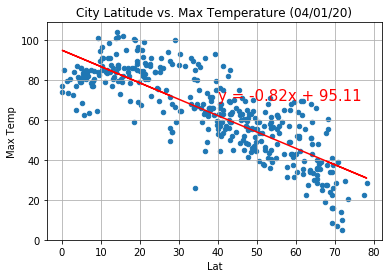

In [152]:
north_data.plot(x='Lat',y='Max Temp',kind = 'scatter',title='City Latitude vs. Max Temperature (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data["Lat"], north_data["Max Temp"])
regress_values = north_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(40,70),fontsize=15,color="red")
print("This shows negative correlation")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

This shows positive correlation


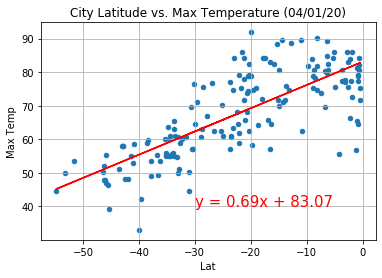

In [153]:
south_data.plot(x='Lat',y='Max Temp',kind = 'scatter',title='City Latitude vs. Max Temperature (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data["Lat"], south_data["Max Temp"])
regress_values = south_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print("This shows positive correlation")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

No apparent correlation


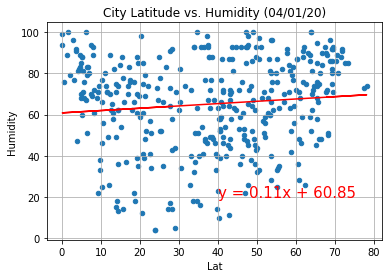

In [154]:
north_data.plot(x='Lat',y='Humidity',kind = 'scatter',title='City Latitude vs. Humidity (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data["Lat"], north_data["Humidity"])
regress_values = north_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print("No apparent correlation")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

No apparent correlation


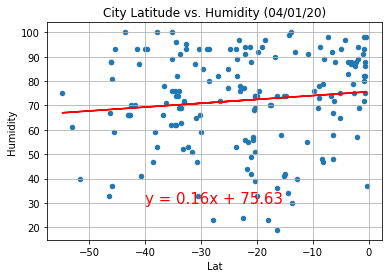

In [155]:
south_data.plot(x='Lat',y='Humidity',kind = 'scatter',title='City Latitude vs. Humidity (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data["Lat"], south_data["Humidity"])
regress_values = south_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
print("No apparent correlation")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

No apparent correlation


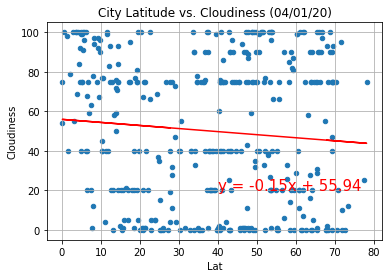

In [156]:
north_data.plot(x='Lat',y='Cloudiness',kind = 'scatter',title='City Latitude vs. Cloudiness (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data["Lat"], north_data["Cloudiness"])
regress_values = north_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print("No apparent correlation")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

No apparent correlation


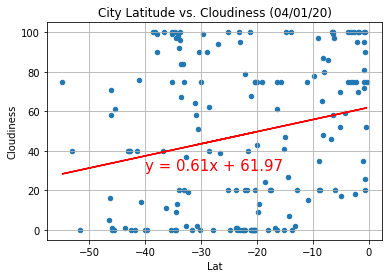

In [157]:
south_data.plot(x='Lat',y='Cloudiness',kind = 'scatter',title='City Latitude vs. Cloudiness (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data["Lat"], south_data["Cloudiness"])
regress_values = south_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
print("No apparent correlation")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

No apparent correlation


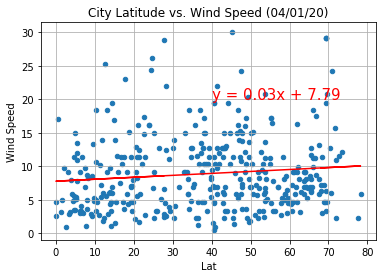

In [158]:
north_data.plot(x='Lat',y='Wind Speed',kind = 'scatter',title='City Latitude vs. Wind Speed (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data["Lat"], north_data["Wind Speed"])
regress_values = north_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print("No apparent correlation")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

No apparent correlation


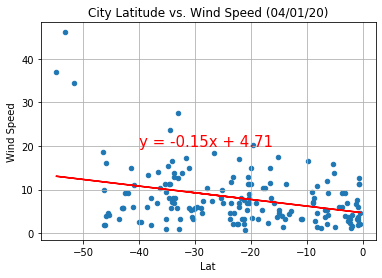

In [159]:
south_data.plot(x='Lat',y='Wind Speed',kind = 'scatter',title='City Latitude vs. Wind Speed (04/01/20)',grid="True")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data["Lat"], south_data["Wind Speed"])
regress_values = south_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data["Lat"],regress_values,color='red')
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
print("No apparent correlation")